In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
%config IPCompleter.greedy=True

## Reading data from file

In [21]:
from collections import Counter

### main dataset ###
data = pd.read_csv("20151219.txt", sep = "\t", header = None)
data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(data["attack_flag"]))

Counter({-1: 149915, 1: 67713})


## Transform to binary

In [22]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(data["attack_flag"]))

Counter({1: 149915, 0: 67713})


## Visualize the attacks structure over time 

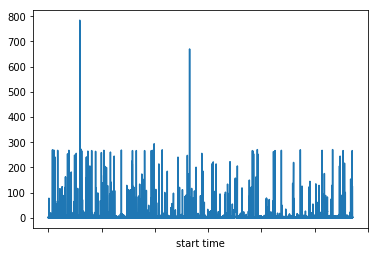

In [23]:
data_red = data.groupby('start time')['attack_flag'].sum()
data_red.plot()

In [24]:
# slice dataset, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(217628, 24)
(217628, 21)


1    149915
0     67713
Name: attack_flag, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 18 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [26]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,6338,17989,udp
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,OTH,1,11,0,icmp
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,14015,17989,udp
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,44074,53,udp
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,49263,25,tcp
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,58398,25,tcp
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,1.0,1.0,1.0,S0,1,55373,23,tcp
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,33244,25,tcp
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,47476,25,tcp
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,10106,17989,udp


In [27]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000
mean,0.855259,56.899333,122.064555,2.952263,0.417481,0.089564,0.542215,29.491720,31.876730,0.071694,0.066464,0.146028,0.688859,34292.130006,3550.084736
std,3.085410,519.846915,748.123612,5.519918,0.491905,0.284547,0.467622,44.351499,43.928101,0.256081,0.248495,0.350052,0.462961,19708.835701,10869.634486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12375.000000,25.000000
50%,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,39682.000000,53.000000
75%,0.013333,45.000000,61.000000,5.000000,1.000000,0.000000,1.000000,96.000000,96.000000,0.000000,0.000000,0.000000,1.000000,50473.000000,1433.000000
max,563.012764,88066.000000,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65498.000000


In [28]:
# removing NaNs
data = data.dropna()
data.shape

(217628, 18)

In [29]:
data["Conn state"].value_counts(dropna=False)

S0        127464
SF         59944
RSTO       11476
OTH         8640
REJ         7998
RSTRH        733
RSTOS0       634
SHR          381
RSTR         304
S1            52
SH             2
Name: Conn state, dtype: int64

In [30]:
data["service"].value_counts(dropna=False)

other    126080
dns       61990
sip       16519
ssh       11518
snmp        665
smtp        495
rdp         328
dhcp         20
http         11
ssl           2
Name: service, dtype: int64

In [31]:
data["proto"].value_counts(dropna=False)

tcp     119162
udp      93548
icmp      4918
Name: proto, dtype: int64

# a bit of feature engineering

## port numbers classification

In [33]:
t1 = 1023  # well-known port numbers
t2 = 49151 # registered ports
t3 = 65535 # client ports

def wk(data_row):
    if (data_row["src port"] <= t1): 
        value = 1
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def reg(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 1
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def cli(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 1
    return value

data["well-known src pool"] = data.apply(wk, axis=1)
data["registered src pool"] = data.apply(reg, axis=1)
data["cli src pool"] = data.apply(cli, axis=1)

In [34]:
print(Counter(data["well-known src pool"]))
print(Counter(data["registered src pool"]))
print(Counter(data["cli src pool"]))

Counter({0: 211216, 1: 6412})
Counter({1: 150534, 0: 67094})
Counter({0: 156946, 1: 60682})


In [35]:
# def wk(data_row):
#     if (data_row["dst port"] <= t1): 
#         value = 1
#     elif ((data_row["dst port"] > t1) and (data_row["dst port"] <= t2)):
#         value = 0
#     elif ((data_row["dst port"] > t2) and (data_row["dst port"] <= t3)):
#         value = 0
#     return value

# def reg(data_row):
#     if (data_row["dst port"] <= t1): 
#         value = 0
#     elif ((data_row["dst port"] > t1) and (data_row["dst port"] <= t2)):
#         value = 1
#     elif ((data_row["dst port"] > t2) and (data_row["dst port"] <= t3)):
#         value = 0
#     return value

# def cli(data_row):
#     if (data_row["dst port"] <= t1): 
#         value = 0
#     elif ((data_row["dst port"] > t1) and (data_row["dst port"] <= t2)):
#         value = 0
#     elif ((data_row["dst port"] > t2) and (data_row["dst port"] <= t3)):
#         value = 1
#     return value

# data["well-known dst pool"] = data.apply(wk, axis=1)
# data["registered dst pool"] = data.apply(reg, axis=1)
# data["cli dst pool"] = data.apply(cli, axis=1)

In [36]:
# print(Counter(data["well-known dst pool"]))
# print(Counter(data["registered dst pool"]))
# print(Counter(data["cli dst pool"]))

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Data columns (total 21 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [38]:
# data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool", "well-known dst pool", "registered dst pool", "cli dst pool"]].head(30)
data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool"]].head(30)

,src port,dst port,well-known src pool,registered src pool,cli src pool
0,40061,111,0,1,0
1,53488,80,0,0,1
2,35051,23,0,1,0
3,1408,445,0,1,0
4,55244,995,0,0,1
5,44544,995,0,1,0
6,50678,5900,0,0,1
7,35051,23,0,1,0
8,50678,5900,0,0,1
9,50678,5900,0,0,1


## Change port number info to categorical

In [39]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)
data['src port'].nunique()
data['dst port'].nunique()

thresh1 = 125
thresh2 = 125
counts1 = data['src port'].value_counts()
counts2 = data['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
data = pd.concat([data, pd.get_dummies(data["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
data = pd.concat([data, pd.get_dummies(data["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [40]:
data.shape

(217628, 214)

## Hot one encoding

In [41]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,...,0,0,0,0,0,1,0,0,0,0
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Columns: 238 entries, conn len to state_SHR
dtypes: float64(7), int64(9), object(5), uint8(217)
memory usage: 81.6+ MB


## Data visualization

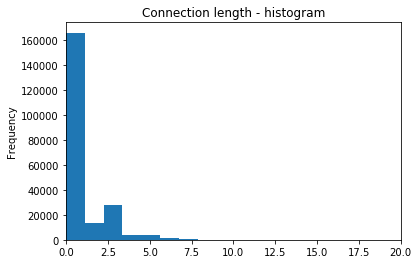

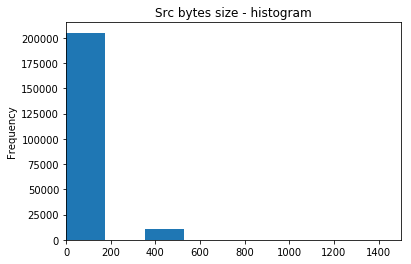

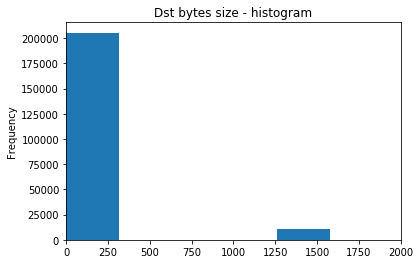

In [43]:
# hisotgrams

#print(max(data['conn len']))
data['conn len'].plot.hist(bins=500, xlim=[0,20], title="Connection length - histogram")
plt.show()

#print(max(data['src bytes']))
data['src bytes'].plot.hist(bins=500, xlim=[0,1500], title="Src bytes size - histogram")
plt.show()

#print(max(data['dst bytes']))
data['dst bytes'].plot.hist(bins=500, xlim=[0,2000], title="Dst bytes size - histogram")
plt.show()

Text(0.5,0.98,'')

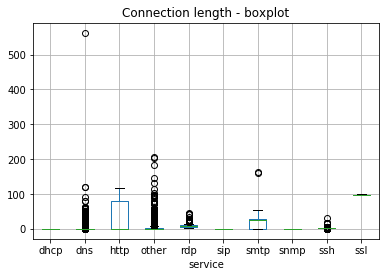

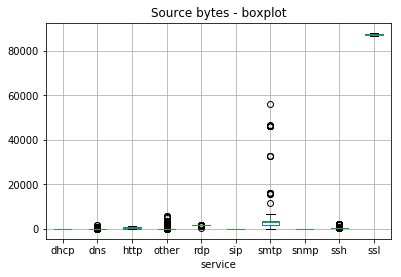

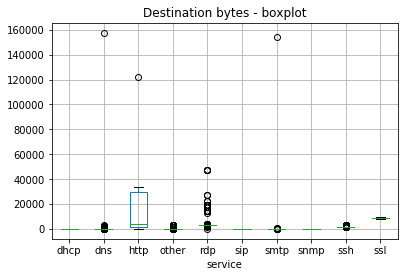

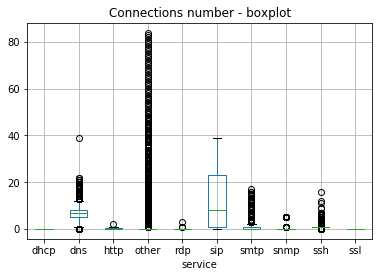

In [44]:
# boxplots
data.boxplot(column='conn len', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

data.boxplot(column='src bytes', by='service')
plt.title("Source bytes - boxplot")
plt.suptitle("")

data.boxplot(column='dst bytes', by='service')
plt.title("Destination bytes - boxplot")
plt.suptitle("")

data.boxplot(column='conn numb', by='service')
plt.title("Connections number - boxplot")
plt.suptitle("")

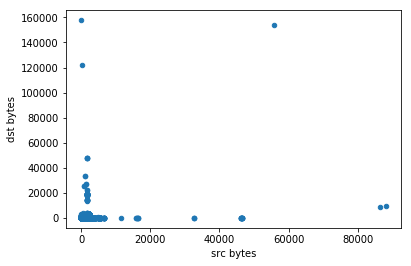

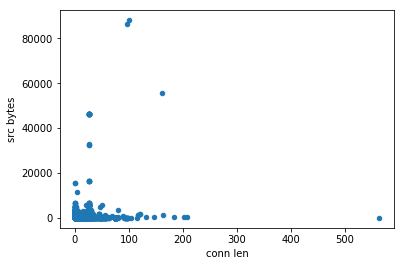

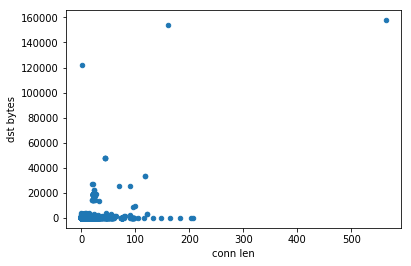

In [45]:
# scatter plots
data.plot.scatter(x='src bytes', y= 'dst bytes')
data.plot.scatter(x='conn len', y= 'src bytes')
data.plot.scatter(x='conn len', y= 'dst bytes')

In [46]:
data.shape

(217628, 238)

## Plot function definition

In [47]:
# plotting method definition

def plot_stats(stat, name, width, rot):
    fig, ax = plt.subplots(figsize=(width, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=rot)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

## Dataset split

In [48]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool"
                    }, inplace=True)

In [49]:
sampled_data = data.loc[range(150000), :]
train, validate, test = np.split(sampled_data, [int(.7*len(sampled_data)), int(.85*len(sampled_data))])

train_ex = train
validate_ex = validate
test_ex = test

train = train.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)
validate = validate.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)
test = test.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)

train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)

y_train_alg = train.loc[:, "attack_flag"].values.ravel()
X_train_alg = train.drop(["attack_flag"], axis=1)
y_validate_alg = validate.loc[:, "attack_flag"].values.ravel()
X_validate_alg = validate.drop(["attack_flag"], axis=1)
y_test_alg = test.loc[:, "attack_flag"].values.ravel()
X_test_alg = test.drop(["attack_flag"], axis=1)

print(Counter(y_test_alg))
print(Counter(y_validate_alg))
print(Counter(y_train_alg))

Counter({0: 14952, 1: 7548})
Counter({1: 14607, 0: 7893})
Counter({1: 86179, 0: 18821})


In [50]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])

train_ex = train
validate_ex = validate
test_ex = test

train = train.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)
validate = validate.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)
test = test.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)

train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)

y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 30946, 0: 1699})
Counter({0: 22937, 1: 9707})
Counter({1: 109262, 0: 43077})


## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

LogisticRegression().get_params()

In [ ]:
hyperparams = {'solver' : ['newton-cg', 'lbfgs', 'sag']}

In [ ]:
#sorted(metrics.SCORERS.keys())

In [ ]:
# clf = GridSearchCV(LogisticRegression(), hyperparams, cv=5, n_jobs=-1, scoring = "f1")
# clf.fit(X_train, y_train)

# print(clf.best_params_)

# # {'solver': 'newton-cg'}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_validate)

name = "logistic Regression"

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Acc[name] = metrics.accuracy_score(y_validate, y_pred)
F1S[name] = metrics.f1_score(y_validate, y_pred)
Prec[name] = metrics.precision_score(y_validate, y_pred)
Rec[name] = metrics.recall_score(y_validate, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

# Decision Tree parameters selection

## Checking tree depth impact

In [35]:
# using gridsearchcv to find the best parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DecisionTreeClassifier(random_state=0).get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [36]:
hyperparams = {'max_depth' : range(1,12)}

In [37]:
# clf = GridSearchCV(DecisionTreeClassifier(random_state=0), hyperparams, cv=5, n_jobs=-1, scoring = "f1")
# clf.fit(X_train, y_train)

# print(clf.best_params_)

# # max depth : 11

{'max_depth': 11}


In [38]:
classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_ent_11":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 11),
               "DecisionTree_11":DecisionTreeClassifier(random_state=0, max_depth = 11),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DecisionTree Accuracy: 0.99920, F1-score: 0.99866, Precision: 0.99846, Recall: 0.99887, FPR: 0.00065
TN: 22922; FP:  15; FN:   11; TP: 9696

Algorithm: DecisionTree_ent_11 Accuracy: 0.99914, F1-score: 0.99856, Precision: 0.99866, Recall: 0.99845, FPR: 0.00057
TN: 22924; FP:  13; FN:   15; TP: 9692

Algorithm: DecisionTree_11 Accuracy: 0.99881, F1-score: 0.99799, Precision: 0.99651, Recall: 0.99948, FPR: 0.00148
TN: 22903; FP:  34; FN:    5; TP: 9702



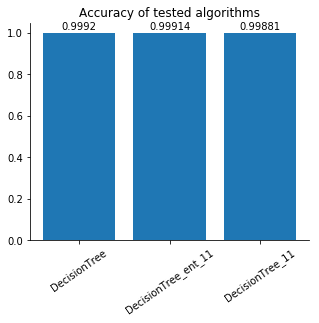

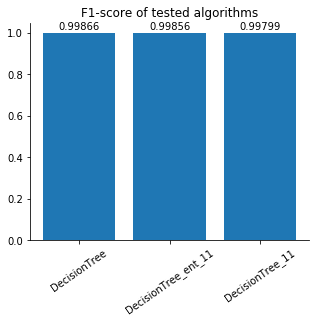

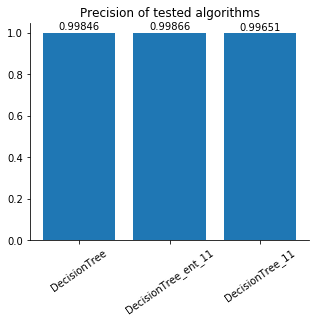

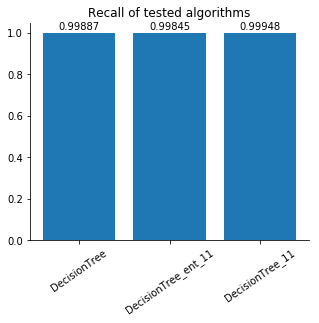

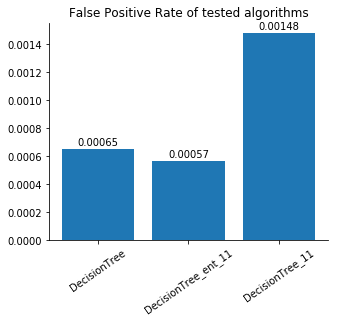

In [39]:
plot_stats(Acc, "Accuracy", 5, 35)
plot_stats(F1S, "F1-score", 5, 35)
plot_stats(Prec, "Precision", 5, 35)
plot_stats(Rec, "Recall", 5, 35)
plot_stats(FPR, "False Positive Rate", 5, 35)

## AdaBoost parameters selection

In [40]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostClassifier(DecisionTreeClassifier(random_state=0)).get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [41]:
hyperparams = {"n_estimators" : range (1, 50)}

In [42]:
# clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(random_state=0)), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
# clf.fit(X_train, y_train)

# print(clf.best_params_)

# # Result: {'n_estimators': 28}, range tested: 1-50

{'n_estimators': 28}


In [43]:
num_trees = 28
seed = 12

classifiers = {
               "AdaBoost_n_est_dct_rs":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_dct_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0),
               "AdaBoost_n_est_dct_def":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "AdaBoost_n_est":AdaBoostClassifier(n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(n_estimators=num_trees, random_state = 0), 
               "AdaBoost_orig":AdaBoostClassifier()
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: AdaBoost_n_est_dct_rs Accuracy: 0.99905, F1-score: 0.99840, Precision: 0.99774, Recall: 0.99907, FPR: 0.00096
TN: 22915; FP:  22; FN:    9; TP: 9698

Algorithm: AdaBoost_n_est_dct_0 Accuracy: 0.99905, F1-score: 0.99840, Precision: 0.99784, Recall: 0.99897, FPR: 0.00092
TN: 22916; FP:  21; FN:   10; TP: 9697

Algorithm: AdaBoost_n_est_dct_def Accuracy: 0.99908, F1-score: 0.99846, Precision: 0.99794, Recall: 0.99897, FPR: 0.00087
TN: 22917; FP:  20; FN:   10; TP: 9697

Algorithm: AdaBoost_n_est Accuracy: 0.99663, F1-score: 0.99433, Precision: 0.99505, Recall: 0.99361, FPR: 0.00209
TN: 22889; FP:  48; FN:   62; TP: 9645

Algorithm: AdaBoost_n_est_0 Accuracy: 0.99663, F1-score: 0.99433, Precision: 0.99505, Recall: 0.99361, FPR: 0.00209
TN: 22889; FP:  48; FN:   62; TP: 9645

Algorithm: AdaBoost_orig Accuracy: 0.99835, F1-score: 0.99722, Precision: 0.99569, Recall: 0.99876, FPR: 0.00183
TN: 22895; FP:  42; FN:   12; TP: 9695



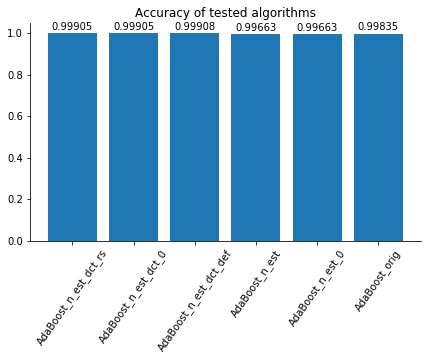

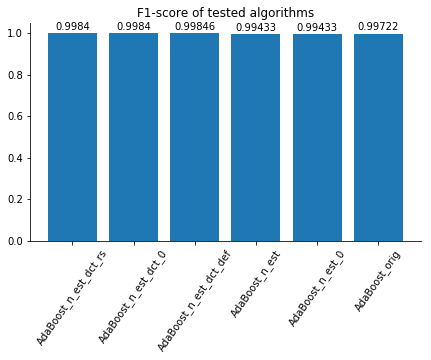

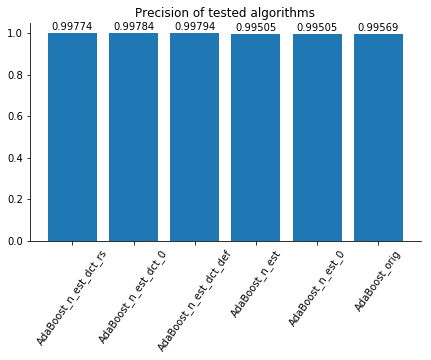

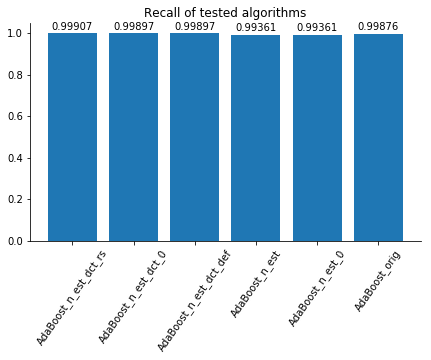

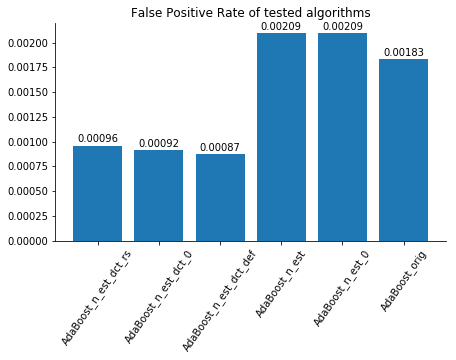

In [44]:
plot_stats(Acc, "Accuracy",7,  55)
plot_stats(F1S, "F1-score", 7, 55)
plot_stats(Prec, "Precision", 7, 55)
plot_stats(Rec, "Recall", 7, 55)
plot_stats(FPR, "False Positive Rate", 7, 55)

## Random tree parameters selection

In [45]:
hyperparams = {'max_depth' : range(1,12)}

In [46]:
# clf = GridSearchCV(DecisionTreeClassifier(random_state=0, splitter = "random"), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
# clf.fit(X_train, y_train)

# print(clf.best_params_) # --> 11

{'max_depth': 11}


In [47]:
classifiers = {
                "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                "RandomTree_11":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 11),                
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: RandomTree   Accuracy: 0.99917, F1-score: 0.99861, Precision: 0.99866, Recall: 0.99856, FPR: 0.00057
TN: 22924; FP:  13; FN:   14; TP: 9693

Algorithm: RandomTree_11 Accuracy: 0.99703, F1-score: 0.99499, Precision: 0.99710, Recall: 0.99289, FPR: 0.00122
TN: 22909; FP:  28; FN:   69; TP: 9638



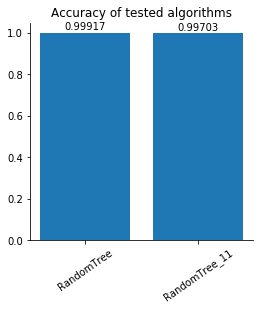

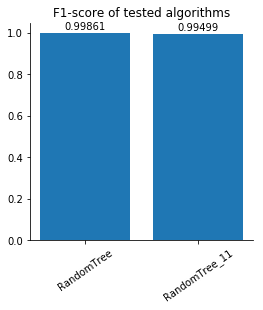

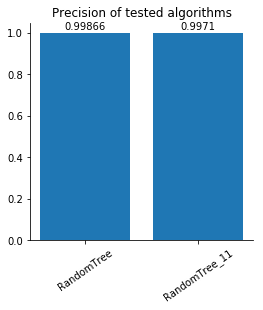

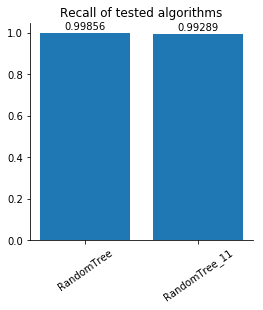

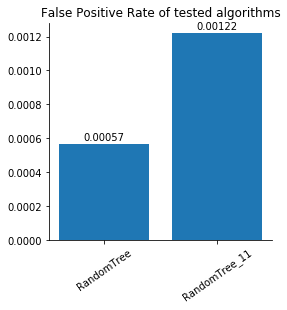

In [48]:
plot_stats(Acc, "Accuracy",4, 35)
plot_stats(F1S, "F1-score", 4, 35)
plot_stats(Prec, "Precision", 4, 35)
plot_stats(Rec, "Recall", 4, 35)
plot_stats(FPR, "False Positive Rate", 4, 35)

## Random Forest parameters selection

In [123]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(random_state=0).get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [125]:
hyperparams = {'n_estimators' : range(1, 50)}

In [126]:
 clf = GridSearchCV(RandomForestClassifier(random_state=0), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
 clf.fit(X_train, y_train)

 print(clf.best_params_)

# # {'n_estimators': 41}

{'n_estimators': 41}


In [50]:
hyperparams = {'max_features' : [None, 'auto', 'sqrt', 'log2']}

In [51]:
clf = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=41), hyperparams, cv=5 ,scoring = "f1", n_jobs=-1)
# clf.fit(X_train, y_train)

# print(clf.best_params_)
# {'max_features': 'auto'}

In [128]:
hyperparams = {'max_depth' : range(1,50)}

In [129]:
clf = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=41, max_features='auto'), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_params_)
# {'max_depth': 36}

{'max_depth': 36}


In [130]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki
from sklearn import metrics

classifiers = {
                "RandomForest_new":RandomForestClassifier(n_estimators=41, max_depth=36, random_state=0),
                "RandomForest_orig":RandomForestClassifier(n_estimators=100),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RandomForest_new Accuracy: 0.99926, F1-score: 0.99876, Precision: 0.99805, Recall: 0.99948, FPR: 0.00083
TN: 22918; FP:  19; FN:    5; TP: 9702

Algorithm: RandomForest_orig Accuracy: 0.99908, F1-score: 0.99846, Precision: 0.99753, Recall: 0.99938, FPR: 0.00105
TN: 22913; FP:  24; FN:    6; TP: 9701



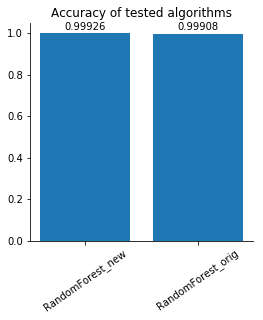

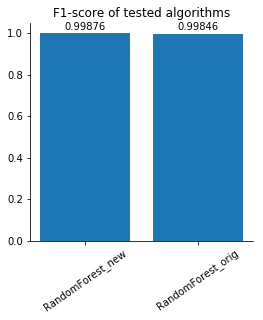

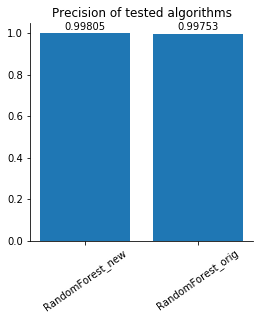

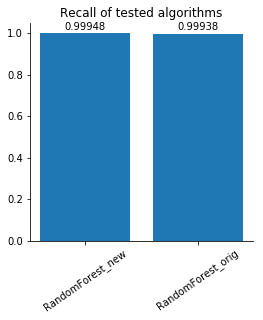

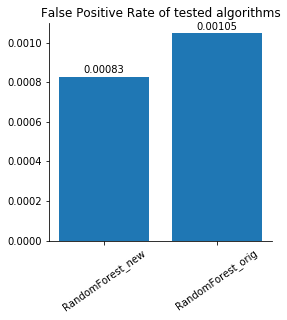

In [131]:
plot_stats(Acc, "Accuracy", 4, 35)
plot_stats(F1S, "F1-score", 4, 35)
plot_stats(Prec, "Precision", 4, 35)
plot_stats(Rec, "Recall", 4, 35)
plot_stats(FPR, "False Positive Rate", 4, 35)

# Algorithms' performance comparison

In [51]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

sampled_data = data.loc[range(150000), :]

train_alg, validate_alg, test_alg = np.split(sampled_data, [int(.7*len(sampled_data)), int(.85*len(sampled_data))])

train_alg = train_alg.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
validate_alg = validate_alg.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
test_alg = test_alg.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)

train_alg = train_alg.sample(frac=1)
validate_alg = validate_alg.sample(frac=1)
test_alg = test_alg.sample(frac=1)

y_train_alg = train_alg.loc[:, "attack_flag"].values.ravel()
X_train_alg = train_alg.drop(["attack_flag"], axis=1).astype(np.float32)
y_validate_alg = validate_alg.loc[:, "attack_flag"].values.ravel()
X_validate_alg = validate_alg.drop(["attack_flag"], axis=1).astype(np.float32)
y_test_alg = test_alg.loc[:, "attack_flag"].values.ravel()
X_test_alg = test_alg.drop(["attack_flag"], axis=1).astype(np.float32)

print(Counter(y_test_alg))
print(Counter(y_validate_alg))
print(Counter(y_train_alg))

Counter({0: 14952, 1: 7548})
Counter({1: 14607, 0: 7893})
Counter({1: 86179, 0: 18821})


In [52]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

data["src_port"] = data["src_port"].apply(str)
data["dst_port"] = data["dst_port"].apply(str)

train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])

train_ex = train
validate_ex = validate
test_ex = test

train = train.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
validate = validate.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
test = test.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)

train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)

y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1).astype(np.float32)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1).astype(np.float32)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1).astype(np.float32)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 30946, 0: 1699})
Counter({0: 22937, 1: 9707})
Counter({1: 109262, 0: 43077})


In [53]:
from collections import Counter

print(Counter(y_test))

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Counter({1: 30946, 0: 1699})


In [54]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred = np.ones(len(y_test)).ravel() 
else:
    y_pred = np.zeros(len(y_test)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.94796, F1-score: 0.97328, Precision: 0.94796, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 1699; FN:    0; TP: 30946



In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test)

name = "logistic Regression"

Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.97326, F1-score: 0.98587, Precision: 0.98780, Recall: 0.98394, FPR: 0.22131
TN: 1323; FP: 376; FN:  497; TP: 30449



In [56]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0)
# # learning rate [1 - default] najlepsze wyniki
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


seed = 12
num_trees = 28

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=41, max_depth=36, random_state=0),
              }


for name, clf in classifiers.items():
    
    model = clf.fit(X_train_alg, y_train_alg)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.98762, F1-score: 0.99345, Precision: 0.99639, Recall: 0.99053, FPR: 0.06533
TN: 1588; FP: 111; FN:  293; TP: 30653

Algorithm: DecisionTree Accuracy: 0.98634, F1-score: 0.99277, Precision: 0.99613, Recall: 0.98943, FPR: 0.07004
TN: 1580; FP: 119; FN:  327; TP: 30619

Algorithm: NaiveBayes   Accuracy: 0.92755, F1-score: 0.96037, Precision: 0.99749, Recall: 0.92590, FPR: 0.04238
TN: 1627; FP:  72; FN: 2293; TP: 28653

Algorithm: RandomTree   Accuracy: 0.98922, F1-score: 0.99430, Precision: 0.99627, Recall: 0.99234, FPR: 0.06769
TN: 1584; FP: 115; FN:  237; TP: 30709

Algorithm: RandomForest Accuracy: 0.98811, F1-score: 0.99372, Precision: 0.99623, Recall: 0.99121, FPR: 0.06828
TN: 1583; FP: 116; FN:  272; TP: 30674



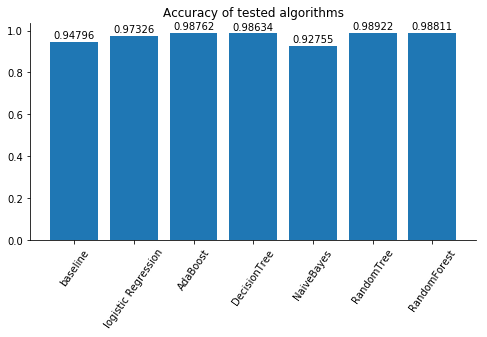

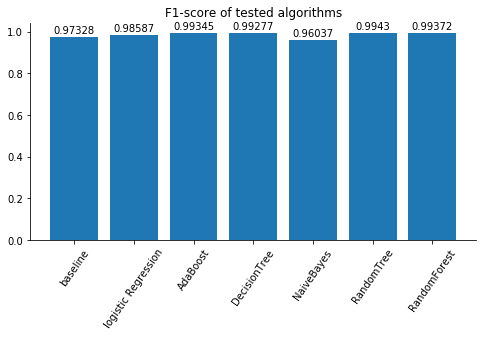

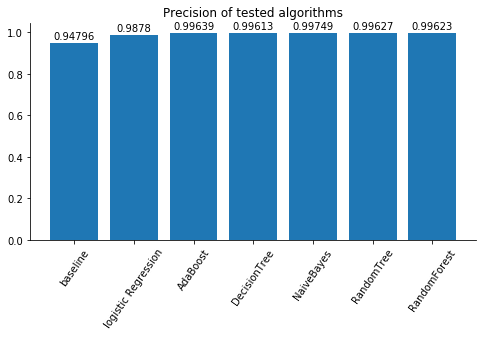

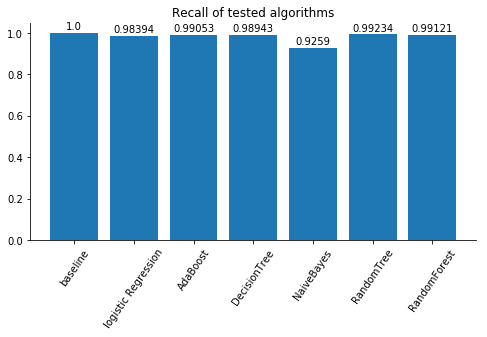

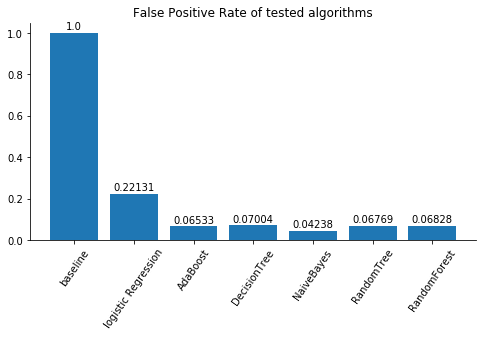

In [57]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Scaling

In [ ]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

seed = 12

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=41, max_depth=36, random_state=0),
              }

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    name = name + "_scaled"
    clf_scaled = make_pipeline(StandardScaler(), clf)
    model = clf_scaled.fit(X_train_alg, y_train_alg)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

In [ ]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

# Random Features for Large-Scale Kernel Machines

In [58]:
import numpy as np
import tensorflow as tf
import time

In [59]:
X_train.values.shape

(152339, 232)

In [60]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(    
    x={"features": X_train.values},    
    y=y_train,    
    batch_size=180,    
    num_epochs=None,    
    shuffle=False)

In [61]:
X_validate.shape

(32644, 232)

In [62]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_validate.values},
    y=y_validate,
    batch_size=X_validate.shape[0],
    num_epochs=1,
    shuffle=False)

In [63]:
X_test.shape

(32645, 232)

In [64]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test.values},
    y=y_test,
    batch_size=X_test.shape[0],
    num_epochs=1,
    shuffle=False)

## Using explicit kernel mappings with the linear model

In [65]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool", 
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                    "Conn state" : "Conn_state" 
                    }, inplace=True)

In [66]:
feat_column = tf.contrib.layers.real_valued_column('features', dimension=len(X_train.columns.values))

In [67]:
kernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(input_dim=len(X_train.columns.values), output_dim=5000, stddev=5, name='rffm')

In [68]:
kernel_mappers = {feat_column: [kernel_mapper]}

In [69]:
optimizer = tf.train.FtrlOptimizer(learning_rate=25, l2_regularization_strength=0.001)

In [70]:
estimator_kernel = tf.contrib.kernel_methods.KernelLinearClassifier(
    n_classes=2,
    optimizer=optimizer,
    kernel_mappers=kernel_mappers, 
    model_dir="kernel_train")

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc6097442b0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_

In [71]:
estimator_kernel.fit(input_fn=train_input_fn, steps=8000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 8000 into kernel_train/model.ckpt.
INFO:tensorflow:loss = 0.002313044, step = 8001
INFO:tensorflow:global_step/sec: 114.569
INFO:tensorflow:loss = 0.023589628, step = 8101 (0.874 sec)
INFO:tensorflow:global_step/sec: 125.596
INFO:tensorflow:loss = 0.007344484, step = 8201 (0.796 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 110.322
INFO:tensorflow:loss = 0.003846007, step = 14001 (0.907 sec)
INFO:tensorflow:global_step/sec: 110.819
INFO:tensorflow:loss = 0.0037010843, step = 14101 (0.902 sec)
INFO:tensorflow:global_step/sec: 116.372
INFO:tensorflow:loss = 0.0016238744, step = 14201 (0.859 sec)
INFO:tensorflow:global_step/sec: 111.842
INFO:tensorflow:loss = 0.0031847677, step = 14301 (0.894 sec)
INFO:tensorflow:global_step/sec: 114.298
INFO:tensorflow:loss = 0.03868576, step = 14401 (0.875 sec)
INFO:tensorflow:global_step/sec: 122.676
INFO:tensorflow:loss = 0.004011177, step = 14501 (0.816 sec)
INFO:tensorflow:global_step/sec: 109.136
INFO:tensorflow:loss = 0.0034688234, step = 14601 (0.916 sec)
INFO:tensorflow:global_step/sec: 103.249
INFO:tensorflow:loss = 0.020764826, step = 14701 (0.969 sec)
INFO:tensorflow:global_step/sec: 74.0156
INFO:tensorflow:loss = 0.011161742, step = 14801 (1.351 sec)
INFO:tensorflow:global_step/sec: 69.1974
INFO:tensorflow:loss = 0.006017922, st

KernelLinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7fc609744160>, 'feature_columns': {_RealValuedColumn(column_name='features_MAPPED', dimension=5000, default_value=None, dtype=tf.float32, normalizer=None)}, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x7fc6097b3e48>, 'kernel_mappers': {_RealValuedColumn(column_name='features', dimension=232, default_value=None, dtype=tf.float32, normalizer=None): [<tensorflow.contrib.kernel_methods.python.mappers.random_fourier_features.RandomFourierFeatureMapper object at 0x7fc6097b3ef0>]}})

In [72]:
eval_metrics = estimator_kernel.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2019-05-17-09:00:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-16000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-05-17-09:00:09
INFO:tensorflow:Saving dict for global step 16000: accuracy = 0.99846834, accuracy/baseline_label_mean = 0.2973594, accuracy/threshold_0.500000_mean = 0.99846834, auc = 0.9998649, auc_precision_recall = 0.99966365, global_step = 16000, labels/actual_label_mean = 0.2973594, labels/prediction_mean = 0.29816133, loss = 0.0060477853, precision/positive_threshold_0.500000_mean = 0.9955866, recall/positive_threshold_0.500000_mean = 0.99927884


In [73]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.99846834
accuracy/baseline_label_mean: 0.2973594
accuracy/threshold_0.500000_mean: 0.99846834
auc: 0.9998649
auc_precision_recall: 0.99966365
global_step: 16000
labels/actual_label_mean: 0.2973594
labels/prediction_mean: 0.29816133
loss: 0.0060477853
precision/positive_threshold_0.500000_mean: 0.9955866
recall/positive_threshold_0.500000_mean: 0.99927884


In [74]:
correctness = []
class_id = []
pred_iterator = None

In [75]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-16000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [76]:
for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])
    #print(pred_dict)

In [77]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test, class_id)
F1S[name] = metrics.f1_score(y_test, class_id)
Prec[name] = metrics.precision_score(y_test, class_id)
Rec[name] = metrics.recall_score(y_test, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, class_id).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

RFFM Accuracy: 0.99393, F1-score: 0.99681, Precision: 0.99517, Recall: 0.99845, FPR: 0.08829
TN: 1549; FP: 150; FN:   48; TP: 30898



# Neural network part

In [78]:
import collections
import io
import math
import tensorflow as tf
from IPython import display

In [79]:
deep_numeric_feat = ["Same_srv_rate", "Serror_rate", "Srv_serror_rate", "Dst_host_count", "Dst_host_srv_count", "Dst_host_same_src_port_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "well_known_src_pool", "registered_src_pool", "cli_src_pool"]
wide_numeric_feat = ["conn_len",  "src_bytes", "dst_bytes", "conn_numb"]
categorical_feat = ["service", "Conn_state", "src_port", "dst_port", "proto"]

In [80]:
deep_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in deep_numeric_feat]
wide_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in wide_numeric_feat]

In [81]:
src_port_mod = ["src_" + s for s in data["src_port"].unique().tolist()]
src_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'src_port', src_port_mod)

dst_port_mod = ["dst_" + s for s in data["dst_port"].unique().tolist()]
dst_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'dst_port', dst_port_mod)

service = tf.feature_column.categorical_column_with_vocabulary_list(
    'service', data["service"].unique().tolist())

Conn_state = tf.feature_column.categorical_column_with_vocabulary_list(
    'Conn_state', data["Conn_state"].unique().tolist())

proto = tf.feature_column.categorical_column_with_vocabulary_list(
    'proto', data["proto"].unique().tolist())

In [103]:
deep_columns = [
    tf.feature_column.indicator_column(service),
    tf.feature_column.indicator_column(Conn_state),
    tf.feature_column.indicator_column(proto),
    tf.feature_column.embedding_column(src_port, dimension=10),
    tf.feature_column.embedding_column(dst_port, dimension=6),
]

In [104]:
crossed_columns = [
      tf.feature_column.crossed_column(
          ['src_port', 'service'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['dst_port', 'service'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'src_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'dst_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['dst_port', 'conn_numb'], hash_bucket_size=10000),  
      tf.feature_column.crossed_column(
          ['service', 'proto'], hash_bucket_size=100),
    
  ]

In [120]:
NN_model = tf.estimator.DNNLinearCombinedClassifier(
    model_dir = "/home/matz/Desktop/ml_ids/NN_model",
    dnn_activation_fn=tf.nn.selu,
    linear_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf + crossed_columns,
    dnn_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf,
    dnn_hidden_units = [950, 550, 300, 175]
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/home/matz/Desktop/ml_ids/NN_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc6324775c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [121]:
feature_set= deep_numeric_feat + wide_numeric_feat + categorical_feat

In [122]:
def get_input_fn(data_set, num_epochs=None, n_batch = 256, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in feature_set}),
       y = pd.Series(data_set["attack_flag"].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [123]:
NN_model.train(input_fn=get_input_fn(train_ex, n_batch=180), steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /home/matz/Desktop/ml_ids/NN_model/model.ckpt.
INFO:tensorflow:loss = 162.36157, step = 1
INFO:tensorflow:global_step/sec: 43.4466
INFO:tensorflow:loss = 420.30057, step = 101 (2.303 sec)
INFO:tensorflow:global_step/sec: 63.1378
INFO:tensorflow:loss = 2.7997997, step = 201 (1.584 sec)
INFO:tensorflow:global_step/sec: 68.4813
INFO:tensorflow:loss = 2.0049436, step = 301 (1.459 sec)
INFO:tensorflow:global_step/sec: 58.2435
INFO:tensorflow:loss = 0.10099631, step = 401 (1.718 sec)
INFO:tensorflow:global_step/sec: 55.6294
INFO:tensorflow:loss = 0.9059249, step = 501 (1.797 sec)
INFO:tensorflow:global_step/sec: 61.1048
INFO:tensorflow:loss = 8.119124, step = 601 (1.637 sec)
INFO:tensorflow:global_step/sec: 59.691

INFO:tensorflow:loss = 0.38160554, step = 8001 (1.410 sec)
INFO:tensorflow:global_step/sec: 72.7239
INFO:tensorflow:loss = 1.3145554, step = 8101 (1.376 sec)
INFO:tensorflow:global_step/sec: 66.5965
INFO:tensorflow:loss = 5.186166, step = 8201 (1.501 sec)
INFO:tensorflow:global_step/sec: 72.249
INFO:tensorflow:loss = 18.26064, step = 8301 (1.384 sec)
INFO:tensorflow:global_step/sec: 67.9288
INFO:tensorflow:loss = 8.601792, step = 8401 (1.472 sec)
INFO:tensorflow:global_step/sec: 69.7904
INFO:tensorflow:loss = 12.838185, step = 8501 (1.433 sec)
INFO:tensorflow:global_step/sec: 72.3281
INFO:tensorflow:loss = 78.170074, step = 8601 (1.383 sec)
INFO:tensorflow:global_step/sec: 68.0942
INFO:tensorflow:loss = 5.9550486, step = 8701 (1.468 sec)
INFO:tensorflow:global_step/sec: 69.1122
INFO:tensorflow:loss = 0.26285478, step = 8801 (1.447 sec)
INFO:tensorflow:global_step/sec: 67.0696
INFO:tensorflow:loss = 1.4969511, step = 8901 (1.491 sec)
INFO:tensorflow:global_step/sec: 59.6432
INFO:tensorf

INFO:tensorflow:global_step/sec: 74.6484
INFO:tensorflow:loss = 0.3856402, step = 16301 (1.340 sec)
INFO:tensorflow:global_step/sec: 69.0387
INFO:tensorflow:loss = 0.36893556, step = 16401 (1.448 sec)
INFO:tensorflow:global_step/sec: 76.4522
INFO:tensorflow:loss = 0.4842146, step = 16501 (1.308 sec)
INFO:tensorflow:global_step/sec: 69.2124
INFO:tensorflow:loss = 2.1548939, step = 16601 (1.445 sec)
INFO:tensorflow:global_step/sec: 70.8735
INFO:tensorflow:loss = 1.482264, step = 16701 (1.411 sec)
INFO:tensorflow:global_step/sec: 71.5791
INFO:tensorflow:loss = 1.8195355, step = 16801 (1.397 sec)
INFO:tensorflow:global_step/sec: 71.9604
INFO:tensorflow:loss = 3.010656, step = 16901 (1.390 sec)
INFO:tensorflow:global_step/sec: 71.8389
INFO:tensorflow:loss = 8.708906, step = 17001 (1.392 sec)
INFO:tensorflow:global_step/sec: 73.2143
INFO:tensorflow:loss = 0.3264354, step = 17101 (1.366 sec)
INFO:tensorflow:global_step/sec: 77.4165
INFO:tensorflow:loss = 0.7057556, step = 17201 (1.292 sec)
IN

In [124]:
eval_metrics = NN_model.evaluate(input_fn=get_input_fn(validate_ex, n_batch=validate_ex.shape[0], shuffle=False), steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-17-09:49:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-05-17-09:49:20
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.9973349, accuracy_baseline = 0.7026406, auc = 0.9998076, auc_precision_recall = 0.99948937, average_loss = 0.009631943, global_step = 20000, label/mean = 0.2973594, loss = 314.42514, precision = 0.99394125, prediction/mean = 0.29716828, recall = 0.9971155
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000


In [125]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.9973349
accuracy_baseline: 0.7026406
auc: 0.9998076
auc_precision_recall: 0.99948937
average_loss: 0.009631943
global_step: 20000
label/mean: 0.2973594
loss: 314.42514
precision: 0.99394125
prediction/mean: 0.29716828
recall: 0.9971155


In [126]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_ex, num_epochs=1, n_batch = test_ex.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [127]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])

In [128]:
from sklearn import metrics
name = "NN"

Acc[name] = metrics.accuracy_score(test_ex["attack_flag"], y_pred)
F1S[name] = metrics.f1_score(test_ex["attack_flag"], y_pred)
Prec[name] = metrics.precision_score(test_ex["attack_flag"], y_pred)
Rec[name] = metrics.recall_score(test_ex["attack_flag"], y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(test_ex["attack_flag"], y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

NN Accuracy: 0.98425, F1-score: 0.99168, Precision: 0.99383, Recall: 0.98953, FPR: 0.11183
TN: 1509; FP: 190; FN:  324; TP: 30622



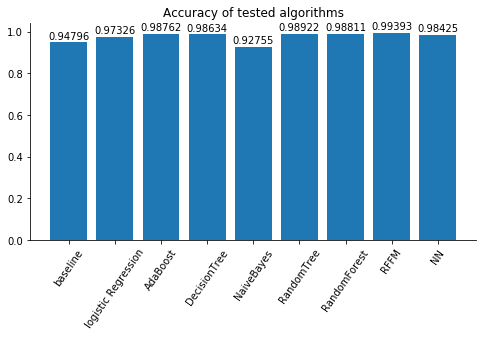

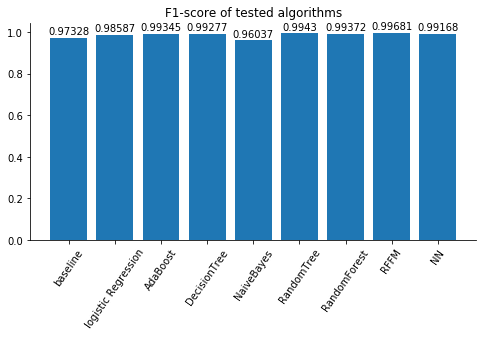

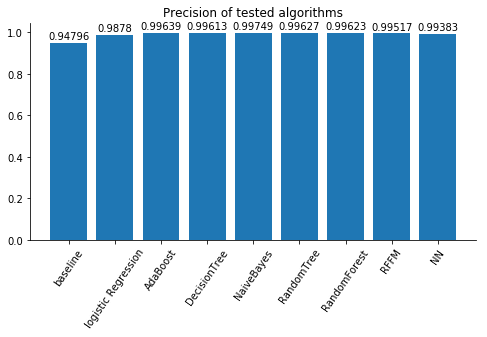

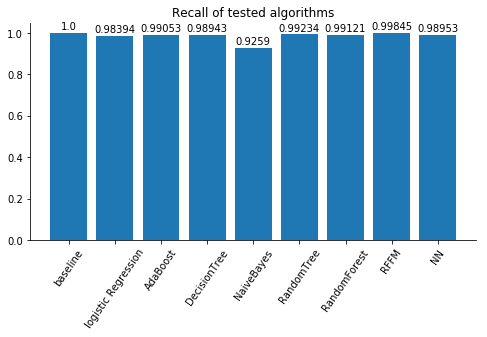

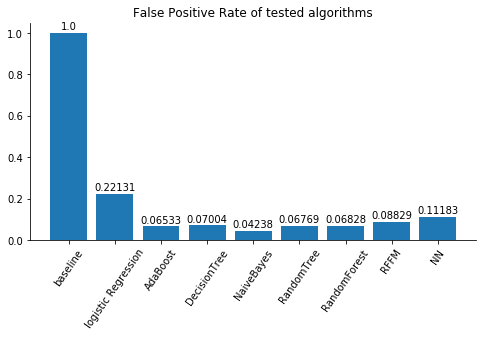

In [129]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Results comparison

In [ ]:
y_pred_NN = y_pred
y_pred = {}

In [ ]:
y_pred["RFFM"] = class_id
y_pred["NN"] = y_pred_NN

In [ ]:
# Metrics of baseline method

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred["baseline"] = np.ones(len(y_test)).ravel() 
else:
    y_pred["baseline"] = np.zeros(len(y_test)).ravel()
        
y_pred["baseline"] = y_pred["baseline"].astype(int)

In [ ]:
classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=41, max_depth=36, random_state=0),
              }

name = "LogisticReg"
model = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
y_pred[name] = model.predict(X_test)

for name, clf in classifiers.items():
    
    model = clf.fit(X_train_alg, y_train_alg)
    
    y_pred[name] = model.predict(X_test)

In [ ]:
y_pred_pand = pd.DataFrame.from_dict(y_pred)
names = ["LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "NN"]
correlations = y_pred_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0.5, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [ ]:
print(correlations)

In [ ]:
failures = {}
failures["baseline"] = []
failures["LogisticReg"] = []
failures["AdaBoost"] = []
failures["DecisionTree"] = []
failures["NaiveBayes"] = []
failures["RandomTree"] = []
failures["RandomForest"] = []
failures["RFFM"] = []
failures["NN"] = []

for i in range(0, len(y_test)):
    for key in y_pred.keys():
        if y_pred[key][i] != y_test[i]:
            failures[key].append(10)
        else:
            failures[key].append(1)

In [ ]:
failures_pand = pd.DataFrame.from_dict(failures)
names = ["baseline", "LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "NN"]
#names = ["baseline", "LogisticReg", "RandomForest"]
correlations = failures_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [ ]:
print(correlations)

In [ ]:
cont_table = [[],[]]
for name in failures.keys():
    print(Counter(failures[name]))
    cont_table[0].append(float(Counter(failures[name])[1]))
    cont_table[1].append(float(Counter(failures[name])[10]))
print(cont_table)

In [ ]:
from scipy import stats

# test of independence
# H0 : results are independent

stat, p, dof, expected = stats.chi2_contingency(cont_table)
stats.chi2_contingency(cont_table)
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('\nreject H0 - results dependent')
else:
    print('\nfailed to reject H0 - results independent')

## New data prediction

In [ ]:
test_set = pd.read_csv("20151220.txt", sep = "\t", header = None)
test_set.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(test_set["attack_flag"]))

In [ ]:
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-2, -1)
test_set.loc[:, "attack_flag"] = test_set.loc[:, "attack_flag"] * -1
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(test_set["attack_flag"]))

In [ ]:
# slice dataset, drop additional features
print(test_set.shape)
test_set = test_set.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(test_set.shape)

# drop software markers
test_set = test_set.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
test_set["attack_flag"].value_counts()

In [ ]:
# removing NaNs
test_set = test_set.dropna()
test_set.shape

In [ ]:
test_set["well-known src pool"] = test_set.apply(wk, axis=1)
test_set["registered src pool"] = test_set.apply(reg, axis=1)
test_set["cli src pool"] = test_set.apply(cli, axis=1)

In [ ]:
test_set["src port"] = test_set["src port"].apply(str)
test_set["dst port"] = test_set["dst port"].apply(str)
test_set['src port'].nunique()
test_set['dst port'].nunique()

thresh1 = 125
thresh2 = 125
counts1 = test_set['src port'].value_counts()
counts2 = test_set['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [ ]:
### hot one encoding ###

# hot one encoding for service
test_set = pd.concat([test_set, pd.get_dummies(test_set["service"], prefix="is")], axis=1)
test_set.tail(10)

#hot one encoding for proto - commented due to reduced column number
test_set = pd.concat([test_set, pd.get_dummies(test_set["proto"], prefix="is")], axis=1)
test_set.tail(10)

# hot one encoding for conn state
test_set = pd.concat([test_set, pd.get_dummies(test_set["Conn state"], prefix="state")], axis=1)
test_set.tail(10)

In [ ]:
# check differences between datasets after hot one encoding

# print(train_data.columns.difference(test_data.columns)[0])
# columns that are not in test but are in train
for c in data.columns.difference(test_set.columns):
    test_set[c] = 0
for c in test_set.columns.difference(data.columns):
    test_set = test_set.drop(c, axis=1)
    
    

In [ ]:
test_new_data = test_set.loc[range(30000), :]

test_new_data_full = test_new_data
test_new_data = test_new_data.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)

test_new_data = test_new_data.sample(frac=1)
y_test_new_data = test_new_data.loc[:, "attack_flag"].values.ravel()
X_test_new_data = test_new_data.drop(["attack_flag"], axis=1)

In [ ]:

# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test_new_data.mean() > (1-y_test_new_data.mean())):
    y_pred = np.ones(len(y_test_new_data)).ravel() 
else:
    y_pred = np.zeros(len(y_test_new_data)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test_new_data)

name = "logistic Regression"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


seed = 12
num_trees = 28

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=41, max_depth=36, random_state=0),
              }


for name, clf in classifiers.items():
    
    model = clf.fit(X_train_alg, y_train_alg)
    
    y_pred = model.predict(X_test_new_data)
    
    Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
    F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
    Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
    Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

In [ ]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

In [ ]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test_new_data.values},
    y=y_test_new_data,
    batch_size=X_test.shape[0],
    num_epochs=1,
    shuffle=False)

In [ ]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

In [ ]:
for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])
    #print(pred_dict)

In [ ]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test_new_data, class_id)
F1S[name] = metrics.f1_score(y_test_new_data, class_id)
Prec[name] = metrics.precision_score(y_test_new_data, class_id)
Rec[name] = metrics.recall_score(y_test_new_data, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, class_id).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

In [ ]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_new_data_full, num_epochs=1, n_batch = X_test.shape[0], shuffle=False)))

In [ ]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])

In [ ]:
name = "NN"

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

In [ ]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)